## Loading Required Libraries

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

## Loading Data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,id,age,income,gender,marital_status,buys
0,1,<21,high,male,single,no
1,2,<21,high,male,married,no
2,3,21-35,high,male,single,yes
3,4,>35,medium,male,single,yes
4,5,>35,low,female,single,yes
5,6,>35,low,female,married,no
6,7,21-35,low,female,married,yes
7,8,<21,medium,male,single,no
8,9,<21,low,female,married,yes
9,10,>35,medium,female,single,yes


In [16]:
df = df.drop(columns=['id'])

In [17]:
for col in ['age', 'income', 'gender', 'marital_status', 'buys']:
    print(df[col].value_counts())
    print()

<21      5
>35      5
21-35    4
Name: age, dtype: int64

medium    6
low       4
high      4
Name: income, dtype: int64

female    7
male      7
Name: gender, dtype: int64

single     7
married    7
Name: marital_status, dtype: int64

yes    9
no     5
Name: buys, dtype: int64



In [18]:
X, y = df.drop(columns=['buys']), df['buys']

In [15]:
le = LabelEncoder()

In [19]:
print(X)

      age  income  gender marital_status
0     <21    high    male         single
1     <21    high    male        married
2   21-35    high    male         single
3     >35  medium    male         single
4     >35     low  female         single
5     >35     low  female        married
6   21-35     low  female        married
7     <21  medium    male         single
8     <21     low  female        married
9     >35  medium  female         single
10    <21  medium  female        married
11  21-35  medium    male        married
12  21-35    high  female         single
13    >35  medium    male        married


In [20]:
X = X.apply(le.fit_transform)

In [21]:
print(X)

    age  income  gender  marital_status
0     1       0       1               1
1     1       0       1               0
2     0       0       1               1
3     2       2       1               1
4     2       1       0               1
5     2       1       0               0
6     0       1       0               0
7     1       2       1               1
8     1       1       0               0
9     2       2       0               1
10    1       2       0               0
11    0       2       1               0
12    0       0       0               1
13    2       2       1               0


In [25]:
y = y.apply(lambda x: x == 'yes')

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(X, y)

DecisionTreeClassifier()

## Test Data

In [29]:
test = {
    'age': '<21',
    'income': 'low',
    'gender': 'female',
    'martial_status': 'married'
}

In [35]:
test_df = pd.DataFrame(test, index=[0])

In [36]:
test_df

,age,income,gender,martial_status
0,<21,low,female,married


In [37]:
X_test = test_df.apply(le.fit_transform)

In [38]:
X_test

,age,income,gender,martial_status
0,0,0,0,0


In [39]:
dt.predict(X_test)

array([ True])

For the given test data the answer is `yes` the person will buy the product.

In [42]:
decision_path = dt.decision_path(X_test)

In [43]:
print(decision_path)

  (0, 0)	1
  (0, 1)	1


## Ploting the Decision Tree

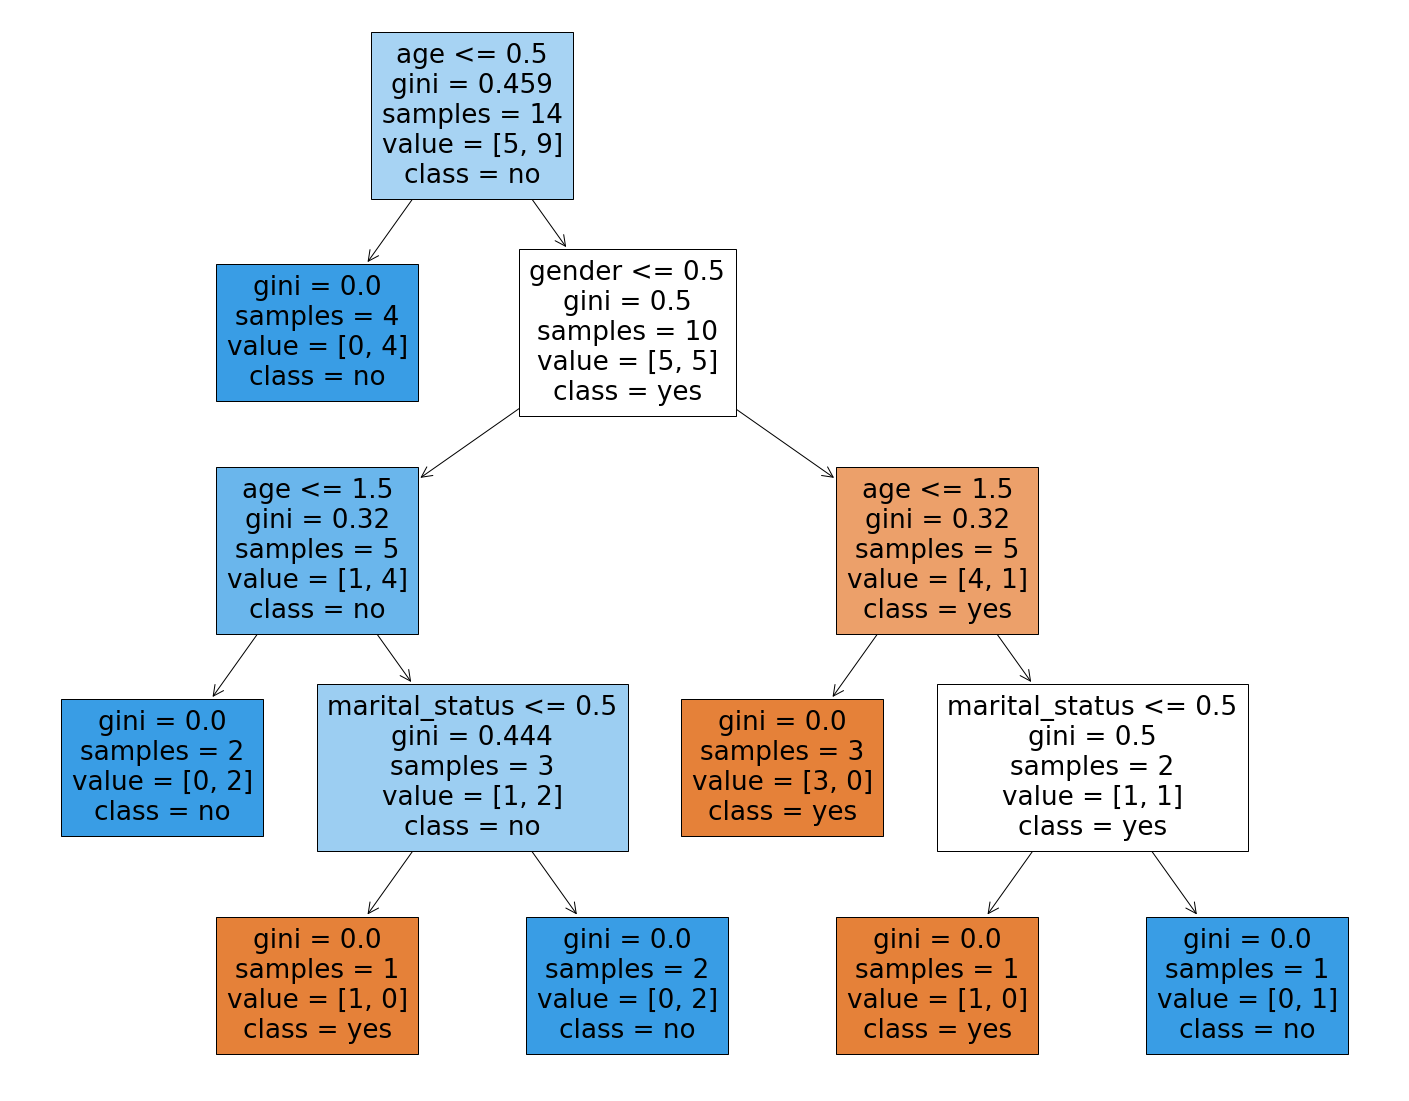

In [56]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, feature_names=df.columns.tolist(),  
                   class_names=['yes', 'no'],
                   filled=True)